# Network Compression Using SVD

### Imports

In [1]:
%tensorflow_version 1.x 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Create Placeholders 
Creates placeholders for the Inputs and Outputs of the Network

In [0]:
def create_placeholders(n_x, n_y):
 
  X = tf.placeholder(tf.float32, [n_x, None])
  Y = tf.placeholder(tf.float32, [n_y, None])
  keep_prob = tf.placeholder(tf.float32)

  return X, Y, keep_prob

### Initialize Network Parameters
Initializing weights(W) and biases(b) for all layers <br>
Using Xavier Initializer for Weights ans Zeros Initializer for biases <br>
Each hidden layer has 1024 hidden units

In [0]:
def initialize_parameters(units = 1024):
  temp = (28 ** 2) 
  W1 = tf.get_variable("W1", [1024 , temp], initializer = tf.contrib.layers.xavier_initializer())
  b1 = tf.get_variable("b1", [1024, 1], initializer = tf.zeros_initializer())
  W2 = tf.get_variable("W2", [1024 , 1024], initializer = tf.contrib.layers.xavier_initializer())
  b2 = tf.get_variable("b2", [1024, 1], initializer = tf.zeros_initializer())
  W3 =  tf.get_variable("W3", [1024 , 1024], initializer = tf.contrib.layers.xavier_initializer())
  b3 = tf.get_variable("b3", [1024, 1], initializer = tf.zeros_initializer())
  W4 = tf.get_variable("W4", [1024 , 1024], initializer = tf.contrib.layers.xavier_initializer())
  b4 = tf.get_variable("b4", [1024, 1], initializer = tf.zeros_initializer())
  W5 = tf.get_variable("W5", [1024 , 1024], initializer = tf.contrib.layers.xavier_initializer())
  b5 = tf.get_variable("b5", [1024, 1], initializer = tf.zeros_initializer())
  
  W6 = tf.get_variable("W6", [10 , 1024], initializer = tf.contrib.layers.xavier_initializer())
  b6 = tf.get_variable("b6", [10, 1], initializer = tf.zeros_initializer())
  
  parameters = {"W1": W1,
                "b1": b1,
               "W2": W2,
                "b2": b2,
               "W3": W3,
                "b3": b3,
               "W4": W4,
                "b4": b4,
               "W5": W5,
                "b5": b5,
               "W6": W6,
                "b6": b6,
               }
  
  return parameters

### Forward Propogation
Fully Connected 5 Layer Neural Netowork <br>
Using ReLU activation for all hidden layers and <br>
Dropout Rate = 0.2 (keep probability = 0.8) <br>
Note: Dropout is used only in training

In [0]:
def forward_propagation(X, parameters, keep_prob):
  W1 = parameters['W1']
  b1 = parameters['b1']
  Z1 = tf.matmul(W1, X) + b1
  A1 = tf.nn.dropout(tf.nn.relu(Z1), keep_prob=keep_prob)
  
  W2 = parameters['W2']
  b2 = parameters['b2']
  Z2 = tf.matmul(W2, A1) + b2
  A2 = tf.nn.dropout(tf.nn.relu(Z2), keep_prob=keep_prob)
  
  W3 = parameters['W3']
  b3 = parameters['b3']
  Z3 = tf.matmul(W3, A2) + b3
  A3 = tf.nn.dropout(tf.nn.relu(Z3), keep_prob=keep_prob)
  
  W4 = parameters['W4']
  b4 = parameters['b4']
  Z4 = tf.matmul(W4, A3) + b4
  A4 = tf.nn.dropout(tf.nn.relu(Z4), keep_prob=keep_prob)
  
  W5 = parameters['W5']
  b5 = parameters['b5']
  Z5 = tf.matmul(W5, A4) + b5
  A5 = tf.nn.dropout(tf.nn.relu(Z5), keep_prob=keep_prob)
  
  W6 = parameters['W6']
  b6 = parameters['b6']
  Z6 = tf.matmul(W6, A5) + b6
   
  
  return Z6

### Compute Cost
Loss Funtion - Cross Entropy (or Log Loss) <br>
Cost is the mean of all the losses for each prediction

In [0]:
def compute_cost(Z6, Y):
  logits = tf.transpose(Z6)
  labels = tf.transpose(Y)
  
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = labels))
  
  return cost

### Initialize Model for Training
Running the model for 25 epochs <br>
learning rate = 1e-4 <br>
minibatch size = 256 <br>
Using Adam Optimization Function


In [0]:
def model(mnist, learning_rate = 0.0001, num_epochs = 25, minibatch_size = 256, print_cost = True):
  
  tf.reset_default_graph()
  m, n_x = mnist.train.images.shape
  n_y = mnist.train.labels.shape[1]
  costs = []
  
  X, Y, keep_prob = create_placeholders(n_x, n_y)
  parameters = initialize_parameters()
  Z6 = forward_propagation(X, parameters, keep_prob)
  cost = compute_cost(Z6, Y)
  
  optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
  init = tf.global_variables_initializer()
  
  
  with tf.Session() as sess:
    sess.run(init)
    
    num_mini_batches = int(m/minibatch_size)
    for epoch in range(num_epochs):
      epoch_cost = 0.0
      
      for i in range(num_mini_batches):
        minibatch_X, minibatch_Y = mnist.train.next_batch(minibatch_size)
        _, minibatch_cost = sess.run([optimizer, cost], feed_dict = {X: minibatch_X.T, Y:minibatch_Y.T, keep_prob: 0.8})
        
        epoch_cost += minibatch_cost / num_mini_batches
       
      if print_cost == True and epoch % 5 == 0:
        print("Cost after epoch %i: %f" %(epoch, epoch_cost))
        
      if print_cost == True:
        costs.append(epoch_cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    parameters = sess.run(parameters)
    print ("Parameters have been trained!")

    correct_prediction = tf.equal(tf.argmax(Z6), tf.argmax(Y))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    print ("Train Accuracy:", accuracy.eval({X: mnist.train.images.T, Y: mnist.train.labels.T, keep_prob : 1}))
    print ("Test Accuracy:", accuracy.eval({X: mnist.test.images.T, Y: mnist.test.labels.T, keep_prob : 1}))
    
    sess.close()
    return parameters 

### Training
Run the model

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Cost after epoch 0: 0.617280
Cost after epoch 5: 0.070130
Cost after epoch 10: 0.029343
Cost after epoch 15: 0.014274
Cost after epoch 20: 0.010524


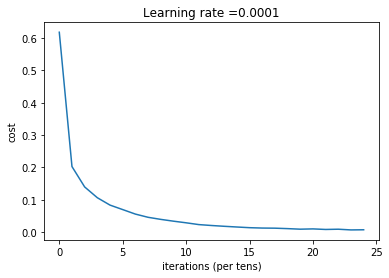

Parameters have been trained!
Train Accuracy: 0.9992727
Test Accuracy: 0.9805


In [7]:
parameters = model(mnist)

### SVD 
Factorizes the Weights of all hidden layers to matrices s, u and v using Singular Value Decomposition 

In [0]:
def svd(parameters = parameters):
  s1, u1, v1 = tf.linalg.svd(parameters['W1'])
  s2, u2, v2 = tf.linalg.svd(parameters['W2'])
  s3, u3, v3 = tf.linalg.svd(parameters['W3'])
  s4, u4, v4 = tf.linalg.svd(parameters['W4'])
  s5, u5, v5 = tf.linalg.svd(parameters['W5'])

  s1 = tf.diag(s1)
  s2 = tf.diag(s2)
  s3 = tf.diag(s3)
  s4 = tf.diag(s4)
  s5 = tf.diag(s5)

  suv = {
      "suv1": [s1, u1, v1], 
      "suv2": [s2, u2, v2], 
      "suv3" : [s3, u3, v3],
      "suv4": [s4, u4, v4], 
      "suv5": [s5, u5, v5],
  }
  return suv

### New Weights
Creates a compressed version of the Weights depending on the Value of D

In [0]:
def get_new_parameters(D, suv, parameters = parameters, full = False):

  s1, u1, v1 = suv["suv1"]
  s2, u2, v2 = suv["suv2"]
  s3, u3, v3 = suv["suv3"]
  s4, u4, v4 = suv["suv4"]
  s5, u5, v5 = suv["suv5"]

  if full:
    W1 = tf.matmul(tf.matmul(u1, s1), tf.transpose(v1))
    W2 = tf.matmul(tf.matmul(u2, s2), tf.transpose(v2))
    W3 = tf.matmul(tf.matmul(u3, s3), tf.transpose(v3))
    W4 = tf.matmul(tf.matmul(u4, s4), tf.transpose(v4))
    W5 = tf.matmul(tf.matmul(u5, s5), tf.transpose(v5))
  else:
    W1 = tf.matmul(tf.matmul(u1[:, :D], s1[:D, :D]), tf.transpose(v1[:, :D]))
    W2 = tf.matmul(tf.matmul(u2[:, :D], s2[:D, :D]), tf.transpose(v2[:, :D]))
    W3 = tf.matmul(tf.matmul(u3[:, :D], s3[:D, :D]), tf.transpose(v3[:, :D]))
    W4 = tf.matmul(tf.matmul(u4[:, :D], s4[:D, :D]), tf.transpose(v4[:, :D]))
    W5 = tf.matmul(tf.matmul(u5[:, :D], s5[:D, :D]), tf.transpose(v5[:, :D]))

  new_parameters = {"W1": W1,
                "b1": parameters['b1'],
               "W2": W2,
                "b2": parameters['b2'],
               "W3": W3,
                "b3": parameters['b3'],
               "W4": W4,
                "b4": parameters['b4'],
               "W5": W5,
                "b5": parameters['b5'],
               "W6": parameters['W6'],
                "b6": parameters['b6'],
               }
  return new_parameters

### Feed Forward Step
Does a feedforward Step on the Test Data for all values of D

In [0]:
def feed_forward(D = None):
  results = []
  tf.reset_default_graph()
  m, n_x = mnist.train.images.shape
  n_y = mnist.train.labels.shape[1]

  suv = svd()
  X, Y, keep_prob = create_placeholders(n_x, n_y)
  
  init = tf.global_variables_initializer()

  if not D:
    D = [10, 20, 50, 100, 200, 'full']

  for i in D:
    if i != 'full':
      parameters = get_new_parameters(i, suv)
    else:
      parameters = get_new_parameters(i, suv, full = True)

    Z6 = forward_propagation(X, parameters, keep_prob)
    cost = compute_cost(Z6, Y)

    all_out = forward_propagation(X, parameters, keep_prob)

    with tf.Session() as sess:
      sess.run(init) 
      correct_prediction = tf.equal(tf.argmax(Z6), tf.argmax(Y))
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
      result = accuracy.eval({X: mnist.test.images.T, Y: mnist.test.labels.T, keep_prob : 1})
      results.append(result)
      print ("Test Accuracy = ", result, "for D = ", i)
      sess.close()

  return results

In [11]:
results = feed_forward()

Test Accuracy =  0.6911 for D =  10
Test Accuracy =  0.818 for D =  20
Test Accuracy =  0.9093 for D =  50
Test Accuracy =  0.9458 for D =  100
Test Accuracy =  0.9627 for D =  200
Test Accuracy =  0.9805 for D =  full


### Plot of Value of D vs Test Accuracy

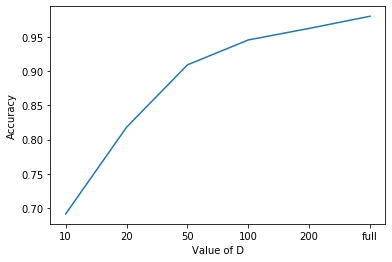

In [12]:
fig, ax = plt.subplots()
ax.plot(results)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Value of D")
x_axis = [0, 10, 20, 50, 100, 200, 'full']
ax.set_xticklabels(x_axis)
plt.show()

### Initialize Parameters for New Network
1. Factorizing the Weights of the previous model using Singular Value Decomposition and then selecting the first 20 important eigen values for each layer (D = 20)
2. Using U and V (sxd) of each layer as new weights to be trained for the new model.
3. Instead of Using 1024x1024 Weight matrix we are using 2 matrices of 1024x20(U) and 20x1024(V) to build the 1024x1024 Weight Matrix. This compresses the original model

In [0]:
def initialize_new_parameters(parameters, suv, D = 20):
  
  s1, u1, v1 = suv["suv1"]
  s2, u2, v2 = suv["suv2"]
  s3, u3, v3 = suv["suv3"]
  s4, u4, v4 = suv["suv4"]
  s5, u5, v5 = suv["suv5"]

  U1 = u1[:, :D]
  V1 = tf.matmul(s1[:D, :D], tf.transpose(v1[:, :D]))
  b1 = tf.get_variable("b1", [1024, 1], initializer = tf.zeros_initializer())
  
  U2 = u2[:, :D]
  V2 = tf.matmul(s2[:D, :D], tf.transpose(v2[:, :D]))
  b2 = tf.get_variable("b2", [1024, 1], initializer = tf.zeros_initializer())
  
  U3 = u3[:, :D] 
  V3 = tf.matmul(s3[:D, :D], tf.transpose(v3[:, :D]))
  b3 = tf.get_variable("b3", [1024, 1], initializer = tf.zeros_initializer())
  
  U4 = u4[:, :D]
  V4 = tf.matmul(s4[:D, :D], tf.transpose(v4[:, :D]))
  b4 = tf.get_variable("b4", [1024, 1], initializer = tf.zeros_initializer())
  
  U5 = u5[:, :D]
  V5 = tf.matmul(s5[:D, :D], tf.transpose(v5[:, :D]))
  b5 = tf.get_variable("b5", [1024, 1], initializer = tf.zeros_initializer())
  
  W6 = parameters['W6']
  # W6 = tf.get_variable("W6", [10 , 1024], initializer = tf.contrib.layers.xavier_initializer())
  b6 = tf.get_variable("b6", [10, 1], initializer = tf.zeros_initializer())
  
  new_parameters = {"U1": U1,
                    "V1": V1,
                "b1": b1,
               "U2": U2,
                "V2": V2,
                "b2": b2,
               "U3": U3,
                "V3": V3,
                "b3": b3,
               "U4": U4,
                "V4": V4,
                "b4": b4,
               "U5": U5,
                "V5": V5,
                "b5": b5,
               "W6": W6,
                "b6": b6,
               }
  
  return new_parameters

### Forward Propagation for the New Model
Same as the first Model. Only difference is that the learnable parameters are U and V for each layer instead of W (which is calculated using UxV).

In [0]:
def new_forward_propagation(X, parameters, keep_prob):
  U1 = parameters['U1']
  V1 = parameters['V1']
  W1 = tf.matmul(U1, V1)
  b1 = parameters['b1']
  Z1 = tf.matmul(W1, X) + b1
  A1 = tf.nn.dropout(tf.nn.relu(Z1), keep_prob=keep_prob)
  
  U2 = parameters['U2']
  V2 = parameters['V2']
  W2 = tf.matmul(U2, V2)
  b2 = parameters['b2']
  Z2 = tf.matmul(W2, A1) + b2
  A2 = tf.nn.dropout(tf.nn.relu(Z2), keep_prob=keep_prob)
  
  U3 = parameters['U3']
  V3 = parameters['V3']
  W3 = tf.matmul(U3, V3)
  b3 = parameters['b3']
  Z3 = tf.matmul(W3, A2) + b3
  A3 = tf.nn.dropout(tf.nn.relu(Z3), keep_prob=keep_prob)
  
  U4 = parameters['U4']
  V4 = parameters['V4']
  W4 = tf.matmul(U4, V4)
  b4 = parameters['b4']
  Z4 = tf.matmul(W4, A3) + b4
  A4 = tf.nn.dropout(tf.nn.relu(Z4), keep_prob=keep_prob)
  
  U5 = parameters['U5']
  V5 = parameters['V5']
  W5 = tf.matmul(U5, V5)
  b5 = parameters['b5']
  Z5 = tf.matmul(W5, A4) + b5
  A5 = tf.nn.dropout(tf.nn.relu(Z5), keep_prob=keep_prob)
  
  W6 = parameters['W6']
  b6 = parameters['b6']
  Z6 = tf.matmul(W6, A5) + b6
   
  return Z6

### Initialize New Model for Training

In [0]:
def new_model(mnist, parameters, learning_rate = 0.001, num_epochs = 50, minibatch_size = 256, print_cost = True):
  
  tf.reset_default_graph()
  m, n_x = mnist.train.images.shape
  n_y = mnist.train.labels.shape[1]
  costs = []
  
  X, Y, keep_prob = create_placeholders(n_x, n_y)

  suv = svd()
  new_parameters = initialize_new_parameters(parameters, suv)
  Z6 = new_forward_propagation(X, new_parameters, keep_prob)
  cost = compute_cost(Z6, Y)
  
  optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
  init = tf.global_variables_initializer()
  
  with tf.Session() as sess:
    sess.run(init)
    
    num_mini_batches = int(m/minibatch_size)
    for epoch in range(num_epochs):
      epoch_cost = 0.0
      
      for i in range(num_mini_batches):
        minibatch_X, minibatch_Y = mnist.train.next_batch(minibatch_size)
        _, minibatch_cost = sess.run([optimizer, cost], feed_dict = {X: minibatch_X.T, Y:minibatch_Y.T, keep_prob: 0.8})
        
        epoch_cost += minibatch_cost / num_mini_batches
       
      if print_cost == True and epoch % 5 == 0:
        print("Cost after epoch %i: %f" %(epoch, epoch_cost))
        
      if print_cost == True:
        costs.append(epoch_cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    # new_parameters = sess.run(new_parameters)
    # print ("Parameters have been trained!")

    correct_prediction = tf.equal(tf.argmax(Z6), tf.argmax(Y))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    print ("Train Accuracy:", accuracy.eval({X: mnist.train.images.T, Y: mnist.train.labels.T, keep_prob : 1}))
    print ("Test Accuracy:", accuracy.eval({X: mnist.test.images.T, Y: mnist.test.labels.T, keep_prob : 1}))
    
    sess.close()
    return parameters 

Running the new Model

Cost after epoch 0: 0.285321
Cost after epoch 5: 0.139553
Cost after epoch 10: 0.123867
Cost after epoch 15: 0.121700
Cost after epoch 20: 0.116697
Cost after epoch 25: 0.113279
Cost after epoch 30: 0.113538
Cost after epoch 35: 0.110772
Cost after epoch 40: 0.109643
Cost after epoch 45: 0.109491


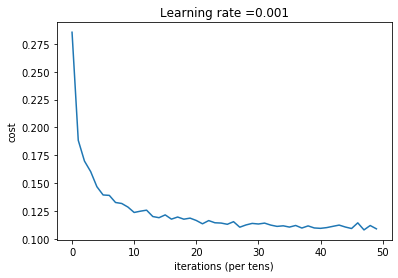

Train Accuracy: 0.9725636
Test Accuracy: 0.965


In [16]:
new_parameters = new_model(mnist, parameters = parameters)